<a href="https://colab.research.google.com/github/Kaneezfatma02/Assignment_03/blob/main/Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Whenever we are going construct a VAR model we have to follow the steps
1. Import pandas and numpy library for uploading and number reading in data table
2. Import matplotlib for plotting the data
3. Splitting the data into train (90%) and test (10%) and using the train data for ADFULLER,VAR and VARMAX
4. Import ADFULLER for stationarity check
5. Import VAR for VAR order section or lag determination with AIC test
6. Import VARMAX for constructing actual VAR model
7. Use of VAR model for forecasting next (10% time)
8. Comparing test data with forecasted data to see accuracy of predictability of VAR model

1. Importing library pandas and numpy for numbers and for uploading data table

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
filepath='https://raw.githubusercontent.com/Kaneezfatma02/Assignment_03/main/Assignment%203%20(1).csv'

In [ ]:
macro_data=pd.read_csv(filepath,parse_dates=['Time'],index_col='Time')

In [ ]:
macro_data.head()

,Y,X
Time,,
1969-01-01,51.53,12252
1970-01-01,50.23,12516
1971-01-01,54.63,12608
1972-01-01,64.48,12861
1973-01-01,51.82,13091


2. Plotting the data table

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline

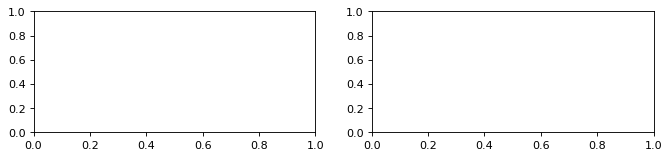

In [ ]:
# Essentials for plotting
fig,axes=plt.subplots(nrows=1,ncols=2,dpi=80, figsize=(10,2))

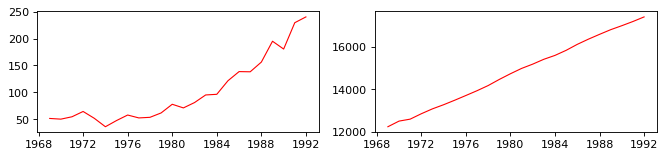

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,dpi=80, figsize=(10,2))
for i,ax in enumerate (axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data, color='red', linewidth=1)

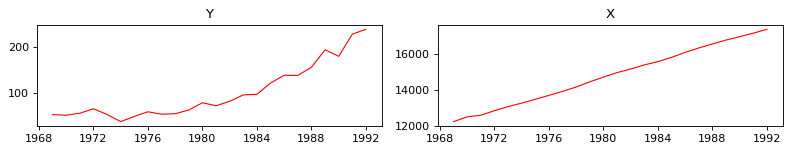

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,dpi=80, figsize=(10,2))
for i,ax in enumerate (axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data, color='red', linewidth=1)
  ax.set_title(macro_data.columns[i])
plt.tight_layout()

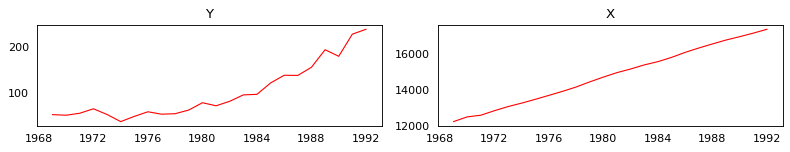

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,dpi=80, figsize=(10,2))
for i,ax in enumerate (axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data, color='red', linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
plt.tight_layout()

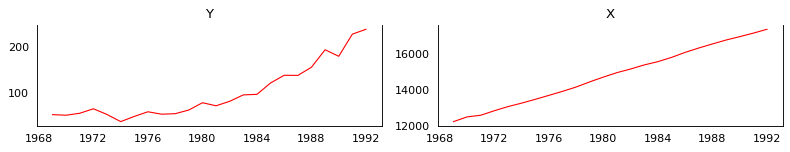

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,dpi=80, figsize=(10,2))
for i,ax in enumerate (axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data, color='red', linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)


plt.tight_layout()

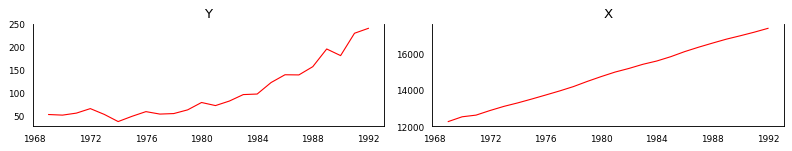

In [ ]:
fig,axes=plt.subplots(nrows=1,ncols=2,dpi=80, figsize=(10,2))
for i,ax in enumerate (axes.flatten()):
  data=macro_data[macro_data.columns[i]]
  ax.plot(data, color='red', linewidth=1)
  ax.set_title(macro_data.columns[i])
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  ax.spines["top"].set_alpha(0)
  ax.tick_params(labelsize=8)


plt.tight_layout()

3. Splitting the data into train (90%) and test (10%) and using the train data for ADFULLER, VAR and VARMAX

In [ ]:
macro_data

,Y,X
Time,,
1969-01-01,51.53,12252
1970-01-01,50.23,12516
1971-01-01,54.63,12608
1972-01-01,64.48,12861
1973-01-01,51.82,13091
1974-01-01,36.13,13284
1975-01-01,47.64,13496
1976-01-01,57.88,13717
1977-01-01,52.50,13942


In [ ]:
train_dt=macro_data[0:-12].dropna()
test_dt=macro_data[-12:].dropna()

In [ ]:
train_dt.tail()

,Y,X
Time,,
1976-01-01,57.88,13717
1977-01-01,52.50,13942
1978-01-01,53.62,14184
1979-01-01,61.75,14471
1980-01-01,77.86,14738


In [ ]:
test_dt

,Y,X
Time,,
1981-01-01,71.11,14988
1982-01-01,81.03,15189
1983-01-01,95.18,15417
1984-01-01,96.38,15599
1985-01-01,121.58,15837
1986-01-01,138.58,16117
1987-01-01,138.23,16361
1988-01-01,156.26,16587
1989-01-01,195.01,16806


4.Import ADFULLER for stationerity check

In [ ]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print ('p value of original Y')
adfuller (train_dt.Y)[1]

p value of original Y


0.9971995630345153

This p value is higher than 0.05 so original Y not stationarity

Now we take first order differncing Y series for stationarity check

In [ ]:
print('p value of 1st order diff Y')
adfuller(train_dt.Y.diff().dropna())[1]

p value of 1st order diff Y


0.7439462753186002

In [ ]:
print('p value of 2nd order diff Y')
adfuller(train_dt.Y.diff().dropna())[1]

p value of 2nd order diff Y


0.7439462753186002

p value of 2nd order diff Y is less than 0.05 so we consider this series of Y is stationary

All series are becoming stationary at 2nd order differncing we consider second order difference in for father analysis of VAR order selection (AIC lag determination) and VARMAX

In [ ]:
train_dt.diff2=(train_dt.Y.diff().diff().dropna())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [ ]:
train_dt.head()

,Y,X
Time,,
1969-01-01,51.53,12252
1970-01-01,50.23,12516
1971-01-01,54.63,12608
1972-01-01,64.48,12861
1973-01-01,51.82,13091


In [ ]:
train_dt.diff2.head()

Time
1971-01-01     5.70
1972-01-01     5.45
1973-01-01   -22.51
1974-01-01    -3.03
1975-01-01    27.20
Name: Y, dtype: float64

5. Import VAR for VAR order selection or lag determination with AIC test

In [ ]:
from statsmodels.tsa.api import VAR

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model=VAR(train_dt)

In [ ]:
result=model.fit()

In [ ]:
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 31, May, 2022
Time:                     12:30:53
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    13.0652
Nobs:                     11.0000    HQIC:                   12.7114
Log likelihood:          -95.8818    FPE:                    391027.
AIC:                      12.8482    Det(Omega_mle):         241400.
--------------------------------------------------------------------
Results for equation Y
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const       -48.471442        58.290781           -0.832           0.406
L1.Y          0.453269         0.419203            1.081           0.280
L1.X          0.005995         0.004348            1.379           0.168

Results for equation X

On the basis of VAR select order summary we come to know that first minimum AIC is found at 4th lag so we will consider 4 lags for VARMAX

6.Import VARMax for constructing actual VAR model

In [ ]:
from statsmodels.tsa.statespace.varmax import VARMAX

In [ ]:
VARMAX_model=VARMAX (train_dt,order=(1,0),enfroce_stationarity=True)

In [ ]:
VARMAX_result=VARMAX_model.fit(disp=False)

In [ ]:
print(VARMAX_result.summary())

                           Statespace Model Results                           
Dep. Variable:             ['Y', 'X']   No. Observations:                   12
Model:                         VAR(1)   Log Likelihood                -123.895
                          + intercept   AIC                            265.790
Date:                Tue, 31 May 2022   BIC                            270.154
Time:                        12:42:45   HQIC                           264.174
Sample:                    01-01-1969                                         
                         - 01-01-1980                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                         nan   Jarque-Bera (JB):           0.72, 0.58
Prob(Q):                               nan   Prob(JB):                   0.70, 0.75
Heteroskedasticity (H):         1.15, 0.54   Skew:                     -0.37, -0.32
Prob(H) (two-sided):            0.89,

7.Use of VAR model forecasting next (10% time)

In [ ]:
n_forecast=12
predict=VARMAX_result.get_prediction(start=len(train_dt),end=len(train_dt)+n_forecast-1)

In [ ]:
predictions=predict.predicted_mean

In [ ]:
predictions.coloumns=[['X_p,Y_p']]
predictions

,Y,X
1981-01-01,82.484297,14690.327353
1982-01-01,85.827693,14589.196167
1983-01-01,87.949268,14447.864513
1984-01-01,88.953252,14279.229814
1985-01-01,88.976985,14095.309336
1986-01-01,88.179354,13906.844907
1987-01-01,86.730151,13723.029340
1988-01-01,84.800684,13551.346954
1989-01-01,82.555841,13397.516735
1990-01-01,80.147751,13265.523931


In [ ]:
test_dt

,Y,X
Time,,
1981-01-01,71.11,14988
1982-01-01,81.03,15189
1983-01-01,95.18,15417
1984-01-01,96.38,15599
1985-01-01,121.58,15837
1986-01-01,138.58,16117
1987-01-01,138.23,16361
1988-01-01,156.26,16587
1989-01-01,195.01,16806


In [ ]:
TvP=pd.concat([test_dt, predictions],axis=1)

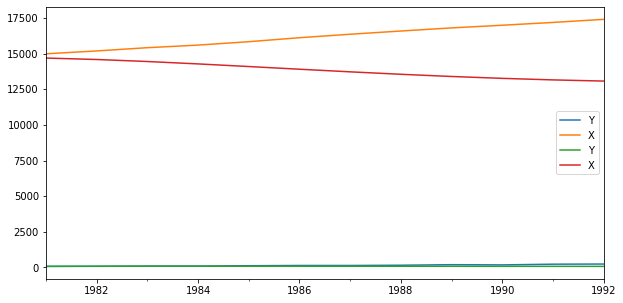

In [ ]:
TvP.plot(figsize=(10,5))